In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

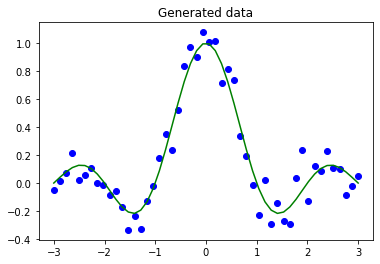

In [2]:
# Create a function to generate the data for the sinc function on [-3,3].
def generateData(N, s):  
    # Generate data on [-3, 3] 
    data = np.reshape(np.linspace(-3, 3, N), (N, 1))
    # Add Gaussian noise
    noise = np.random.normal(0, s, N)

    # Use sinc function to create model with and without noise
    t1 = np.sinc(data).ravel() # Without noise     
    t1 = np.reshape(t1, (N, 1)) 
    t2 = np.sinc(data).ravel() + noise # With noise
    t2 = np.reshape(t2, (N, 1))

    # Create plots
    plt.plot(data, t1, c = 'green', label = 'Original Curve')
    plt.scatter(data, t2, c = 'blue', label = 'Data')
    plt.title("Generated data")
    return data, t1, t2

# Set inital parameters
N = 50 # Number of data points
s = 0.1 # Gaussian noise which will be added to the data 
plt.figure(1)
X, y, true = generateData(N, s)
y = y.ravel()

In [3]:
# Create function to output the optimal parameters for the SVR using 10 cross validations
scorer = make_scorer(mean_squared_error, greater_is_better=False)
parameters = [{'kernel': ['rbf'],
               'C': [1000, 100, 10, 1],
               'gamma':[0.1, 0.2, 0.5, 0.7, 0.9]}]
print("Tuning hyper-parameters")
svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = 10, scoring=scorer)
svr.fit(X,y)
svr.best_params_
# We can see that this function returns C=1000 and gamma = 0.5 as ideal. 

Tuning hyper-parameters


{'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}

Mean squared error: 0.01


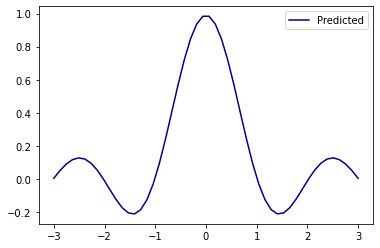

In [4]:
# Trained SVM with optimal parameters
svr = SVR(kernel='rbf', C=1000, gamma = 0.5, epsilon = 0.01)
y_rbf = svr.fit(X, y).predict(X)

# Plotting
plt.figure(1)
plt.plot(X, y_rbf, c = 'navy', label = 'Predicted')
plt.legend()

print("Mean squared error: %.2f" % mean_squared_error(true, y_rbf))

In [5]:
# Resources:
#    How to add noise to a signal using NumPy in Python. (n.d.). Kite.
#    https://www.kite.com/python/answers/how-to-add-noise-to-a-signal-using-numpy-in-python
#
#    Numpy.sinc. (n.d.). NumPy.
#    https://numpy.org/doc/stable/reference/generated/numpy.sinc.html 
#
#    Rastogi, T. (2017, Dec 30). Tuning parameters for SVM Regression. Stack Overflow. 
#    https://stackoverflow.com/questions/48033510/tuning-parameters-for-svm-regression 